In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor


In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
df_fit = pd.read_excel('C:\\Users\\Rike\\Documents\\Ironhack\\MachineLearningW7\\fitness_data.xlsx')
# https://www.kaggle.com/datasets/arnavsmayan/fitness-tracker-dataset

In [27]:
df_fit.shape

(36500, 16)

In [29]:
df_fit.head(10)

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
1,1,Sara Martinez,2023-01-02,19,Female,191,80,7010,1806,NaN,3.103590,47.0,72.0,Cardio,9,Neutral
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
4,1,Sara Martinez,2023-01-05,19,Female,191,80,10247,3571,5.132654,NaN,53.0,61.0,Yoga,8,Sad
5,1,Sara Martinez,2023-01-06,19,Female,191,80,5081,2165,NaN,1.644844,73.0,80.0,Yoga,10,Happy
6,1,Sara Martinez,2023-01-07,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,1,Sara Martinez,2023-01-08,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral
8,1,Sara Martinez,2023-01-09,19,Female,191,80,2366,2344,5.007600,3.800947,NaN,74.0,Cardio,5,Stressed
9,1,Sara Martinez,2023-01-10,19,Female,191,80,11639,3283,8.619244,2.017812,115.0,80.0,Yoga,8,Neutral


In [30]:
df_fit.nunique()

User_ID                    100
Full Name                   59
Date                       365
Age                         33
Gender                       3
Height (cm)                 36
Weight (kg)                 40
Steps_Taken              15614
Calories_Burned           2500
Hours_Slept              32841
Water_Intake (Liters)    31099
Active_Minutes              90
Heart_Rate (bpm)            40
Workout_Type                 4
Stress_Level (1-10)         10
Mood                         4
dtype: int64

In [31]:
df_fit.isna().sum()

User_ID                     0
Full Name                   0
Date                        0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Steps_Taken                 0
Calories_Burned             0
Hours_Slept              3659
Water_Intake (Liters)    5401
Active_Minutes           1867
Heart_Rate (bpm)         1832
Workout_Type                0
Stress_Level (1-10)         0
Mood                        0
dtype: int64

In [32]:
df_fit.dropna(inplace= True)
df_fit

,User_ID,Full Name,Date,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,1,Sara Martinez,2023-01-01,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
2,1,Sara Martinez,2023-01-03,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,1,Sara Martinez,2023-01-04,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
6,1,Sara Martinez,2023-01-07,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,1,Sara Martinez,2023-01-08,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36493,100,Sara Jones,2023-12-25,54,Male,151,107,16593,1958,4.377548,2.683753,43.0,95.0,None,7,Neutral
36494,100,Sara Jones,2023-12-26,54,Male,151,107,5875,3005,4.540873,2.188161,30.0,93.0,None,8,Happy
36497,100,Sara Jones,2023-12-29,54,Male,151,107,11892,2906,7.173268,3.237390,43.0,67.0,Cardio,9,Happy
36498,100,Sara Jones,2023-12-30,54,Male,151,107,12967,1863,4.011179,3.650197,85.0,61.0,Yoga,4,Happy


In [33]:
df_fit['Workout_Type'].unique()
# 1. cardio, 2. strength, 3. yoga, 4. none

array(['Yoga', 'Cardio', 'None', 'Strength'], dtype=object)

In [34]:
df_fit['Mood'].unique()  # 0 Stressed, 1 Sad, 2 Neutral, 3 Happy

array(['Happy', 'Sad', 'Neutral', 'Stressed'], dtype=object)

In [35]:
df_fit2 = df_fit.drop(columns=['Full Name','Date', 'User_ID'])
df_fit2.head()

,Age,Gender,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Workout_Type,Stress_Level (1-10),Mood
0,19,Female,191,80,11405,1862,7.021201,3.440508,80.0,84.0,Yoga,2,Happy
2,19,Female,191,80,18942,2274,8.167817,3.814843,46.0,85.0,Yoga,6,Sad
3,19,Female,191,80,13778,2656,7.453552,3.508636,105.0,77.0,Yoga,2,Sad
6,19,Female,191,80,12078,1756,8.983713,2.701125,34.0,70.0,Cardio,1,Neutral
7,19,Female,191,80,18323,3167,6.925079,2.594056,102.0,88.0,Yoga,3,Neutral


In [36]:
df_fit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25207 entries, 0 to 36499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    25207 non-null  int64  
 1   Gender                 25207 non-null  object 
 2   Height (cm)            25207 non-null  int64  
 3   Weight (kg)            25207 non-null  int64  
 4   Steps_Taken            25207 non-null  int64  
 5   Calories_Burned        25207 non-null  int64  
 6   Hours_Slept            25207 non-null  float64
 7   Water_Intake (Liters)  25207 non-null  float64
 8   Active_Minutes         25207 non-null  float64
 9   Heart_Rate (bpm)       25207 non-null  float64
 10  Workout_Type           25207 non-null  object 
 11  Stress_Level (1-10)    25207 non-null  int64  
 12  Mood                   25207 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 2.7+ MB


In [37]:
num_df = df_fit2.select_dtypes('number')
num_df

,Age,Height (cm),Weight (kg),Steps_Taken,Calories_Burned,Hours_Slept,Water_Intake (Liters),Active_Minutes,Heart_Rate (bpm),Stress_Level (1-10)
0,19,191,80,11405,1862,7.021201,3.440508,80.0,84.0,2
2,19,191,80,18942,2274,8.167817,3.814843,46.0,85.0,6
3,19,191,80,13778,2656,7.453552,3.508636,105.0,77.0,2
6,19,191,80,12078,1756,8.983713,2.701125,34.0,70.0,1
7,19,191,80,18323,3167,6.925079,2.594056,102.0,88.0,3
...,...,...,...,...,...,...,...,...,...,...
36493,54,151,107,16593,1958,4.377548,2.683753,43.0,95.0,7
36494,54,151,107,5875,3005,4.540873,2.188161,30.0,93.0,8
36497,54,151,107,11892,2906,7.173268,3.237390,43.0,67.0,9
36498,54,151,107,12967,1863,4.011179,3.650197,85.0,61.0,4


In [38]:
df_gender = pd.get_dummies(df_fit2['Gender'], dtype=int)
df_gender.head()
df_fit2.drop(columns= ['Gender'], inplace = True) # drop the old gender column

In [39]:
df_fit2['Height_Weight_Ratio'] = df_fit2['Height (cm)'] / df_fit2['Weight (kg)']

# df_fit2['Steps_per_Active_Minute'] = df_fit2['Steps_Taken'] / df_fit2['Active_Minutes'] #.replace(0, np.nan)



In [40]:
#df_fit_test = df_fit2.drop(columns = ['Height (cm)', 'Weight (kg)', 'Water_Intake (Liters)', 'Stress_Level (1-10)', 'Mood'])

In [41]:
df_fit3 = df_fit2.drop(columns = ['Height (cm)', 'Weight (kg)', 'Water_Intake (Liters)', 'Stress_Level (1-10)', 'Mood'])
df_fit3

,Age,Steps_Taken,Calories_Burned,Hours_Slept,Active_Minutes,Heart_Rate (bpm),Workout_Type,Height_Weight_Ratio
0,19,11405,1862,7.021201,80.0,84.0,Yoga,2.387500
2,19,18942,2274,8.167817,46.0,85.0,Yoga,2.387500
3,19,13778,2656,7.453552,105.0,77.0,Yoga,2.387500
6,19,12078,1756,8.983713,34.0,70.0,Cardio,2.387500
7,19,18323,3167,6.925079,102.0,88.0,Yoga,2.387500
...,...,...,...,...,...,...,...,...
36493,54,16593,1958,4.377548,43.0,95.0,None,1.411215
36494,54,5875,3005,4.540873,30.0,93.0,None,1.411215
36497,54,11892,2906,7.173268,43.0,67.0,Cardio,1.411215
36498,54,12967,1863,4.011179,85.0,61.0,Yoga,1.411215


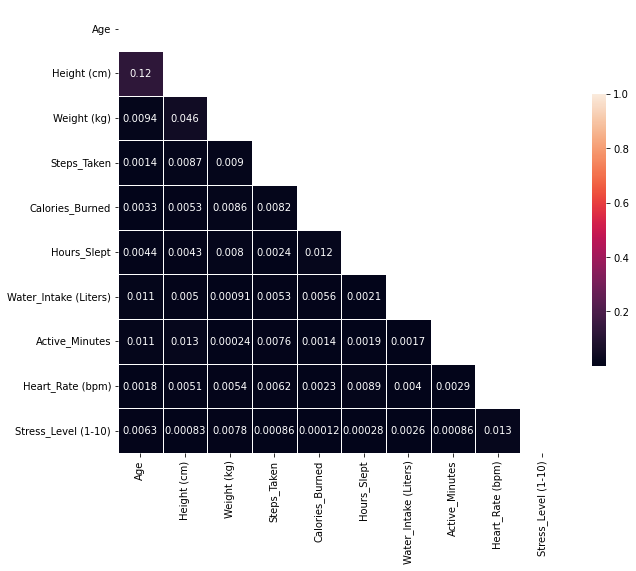

In [42]:
# corr=np.abs(df_fit_final.corr())
corr=np.abs(num_df.corr())


# cols = [target] + [col for col in df_fit3.columns if col != target]


#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [43]:
workout_order = ['None', 'Yoga', 'Strength', 'Cardio']  # ranking

# convert workout_type column into ordinal variable
df_fit3['Workout_Type'] = pd.Categorical(df_fit3['Workout_Type'], categories=workout_order, ordered=True)
df_fit3['Workout_Type'] = df_fit3['Workout_Type'].cat.codes    
df_fit3.head()

,Age,Steps_Taken,Calories_Burned,Hours_Slept,Active_Minutes,Heart_Rate (bpm),Workout_Type,Height_Weight_Ratio
0,19,11405,1862,7.021201,80.0,84.0,1,2.3875
2,19,18942,2274,8.167817,46.0,85.0,1,2.3875
3,19,13778,2656,7.453552,105.0,77.0,1,2.3875
6,19,12078,1756,8.983713,34.0,70.0,3,2.3875
7,19,18323,3167,6.925079,102.0,88.0,1,2.3875


In [183]:
# mood_order = ['Happy', 'Neutral', 'Sad', 'Stressed']
# df_fit2['Mood'] = pd.Categorical(df_fit2['Mood'], categories= mood_order, ordered=True)
# df_fit2['Mood'] = df_fit2['Mood'].cat.codes    
# df_fit2

In [44]:
df_fit_final = pd.concat([df_fit3, df_gender], axis=1)


In [47]:
# definition of bins for agegroups
bins = [0, 17, 29, 39, 49, 64, 100] 
labels = ['0-17', '18-29', '30-39', '40-49', '50-64', '65+']  # Labels for groups

# create agegroups
df_fit_final['Age_Group'] = pd.cut(df_fit_final['Age'], bins=bins, labels=labels, right=True)
df_fit_final.drop(columns=['Other'], inplace=True)
df_fit_final.drop(columns=['Age'], inplace=True)

# Label-Encoding
df_fit_final['Age_Group'] = df_fit_final['Age_Group'].cat.codes



df_fit_final.tail(40) # prove


,Steps_Taken,Calories_Burned,Hours_Slept,Active_Minutes,Heart_Rate (bpm),Workout_Type,Height_Weight_Ratio,Female,Male,Age_Group
36439,10041,3976,5.434545,68.0,61.0,0,1.411215,0,1,4
36441,14260,2416,4.546620,70.0,61.0,3,1.411215,0,1,4
36444,12294,2766,7.162546,42.0,79.0,2,1.411215,0,1,4
36448,15564,3524,7.335363,100.0,89.0,2,1.411215,0,1,4
36450,13554,3945,5.991677,50.0,80.0,1,1.411215,0,1,4
36451,15917,2553,7.757228,106.0,81.0,0,1.411215,0,1,4
36453,11750,3069,8.306227,58.0,61.0,0,1.411215,0,1,4
36455,2442,1606,4.555445,41.0,81.0,2,1.411215,0,1,4
36456,19216,3697,8.417910,55.0,67.0,2,1.411215,0,1,4
36459,12036,1522,8.783293,52.0,64.0,0,1.411215,0,1,4


In [48]:
features = df_fit_final.drop(columns = ["Calories_Burned"])

In [49]:
target = df_fit_final['Calories_Burned']

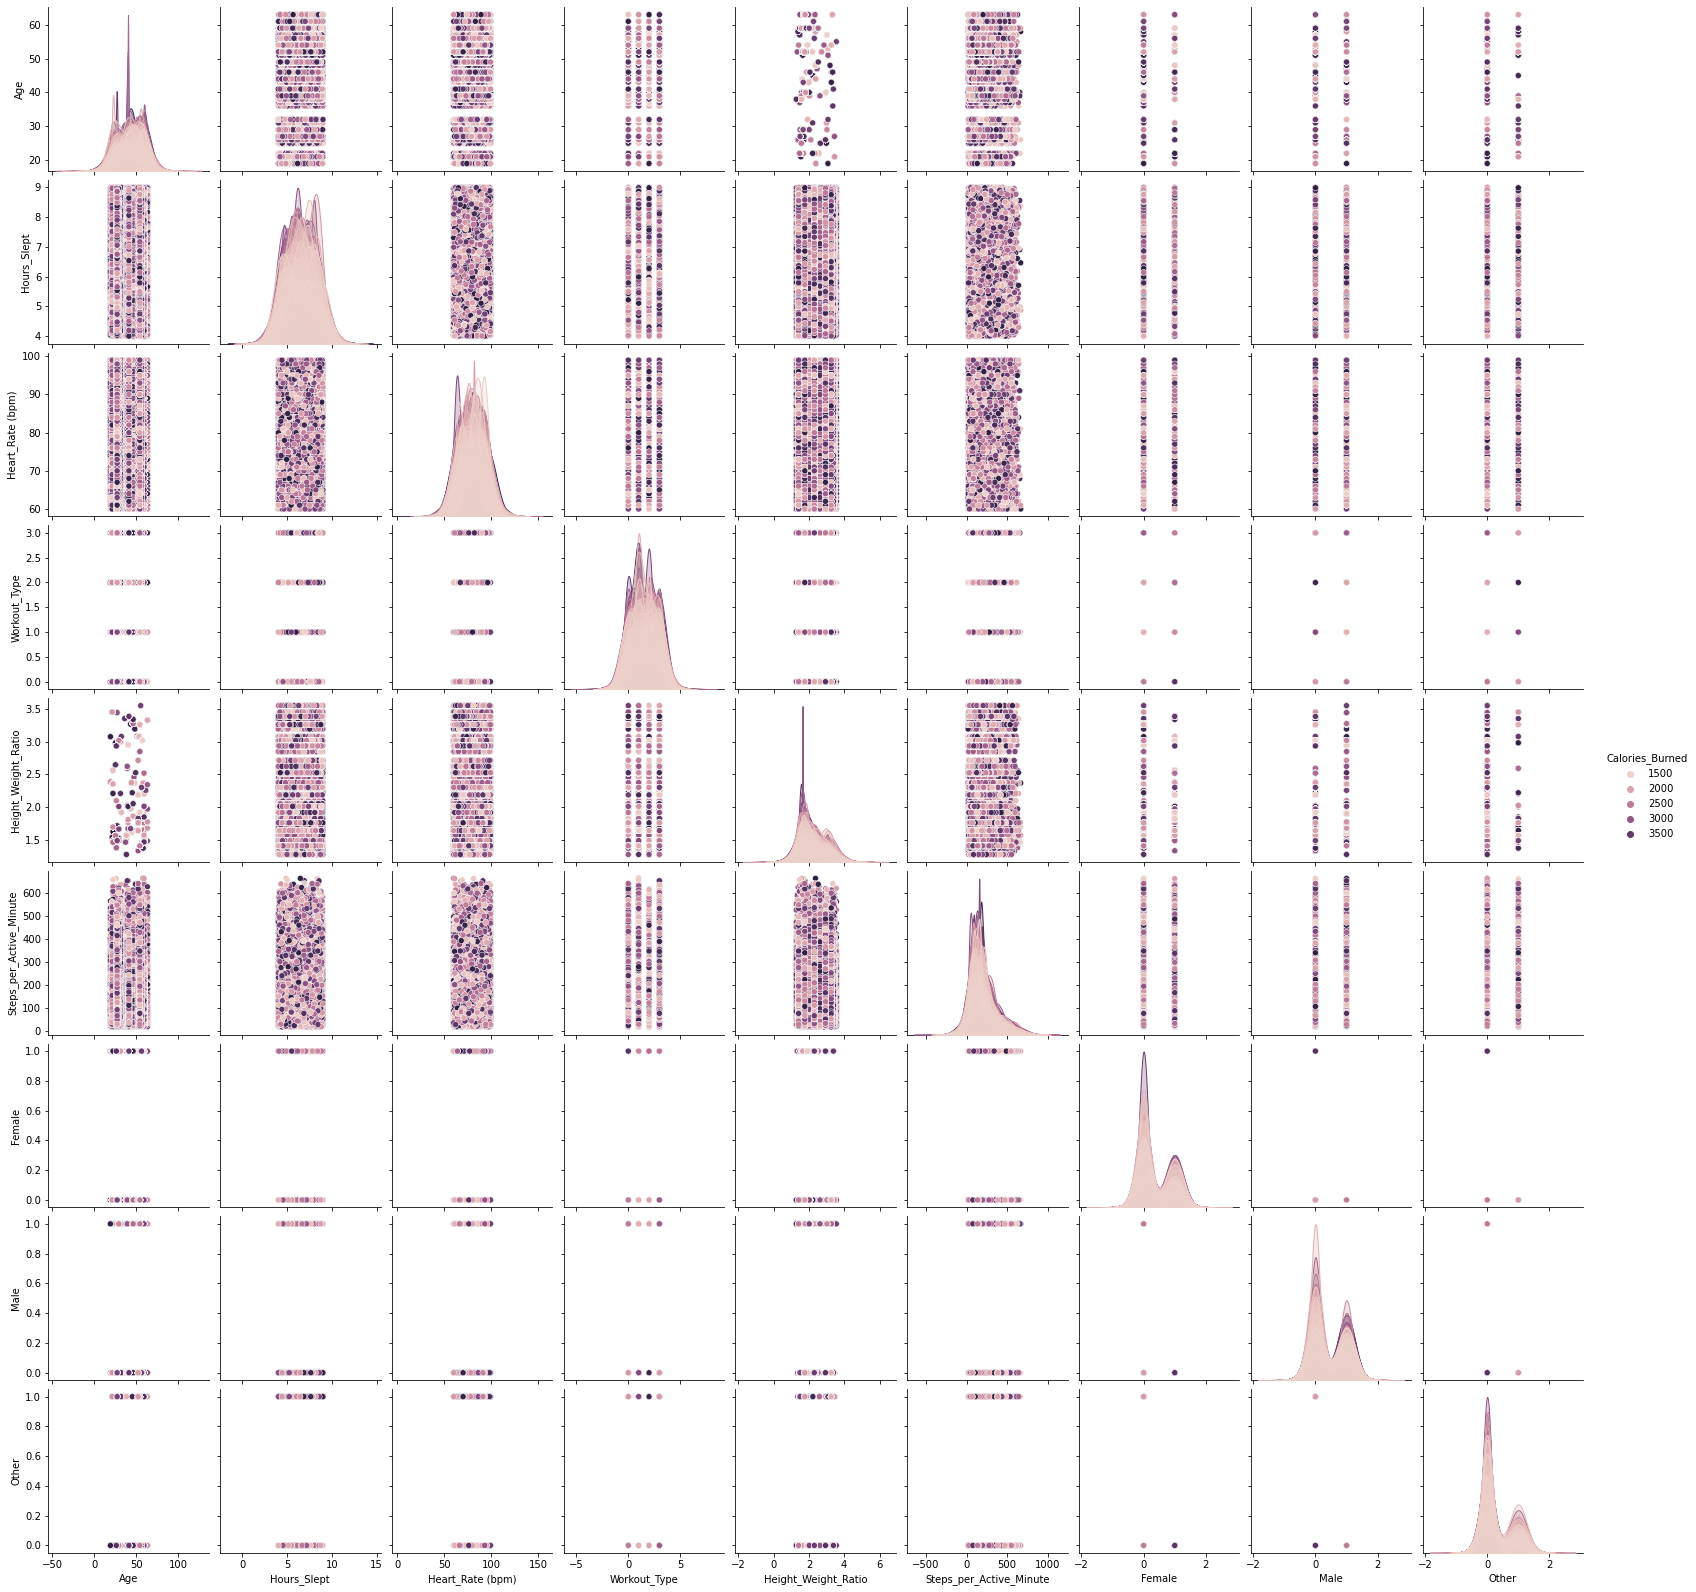

In [156]:
#sns.pairplot(df_fit_final, hue="Calories_Burned")
#plt.show()

In [86]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
knn = KNeighborsRegressor(n_neighbors=10)

In [91]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [92]:
knn.predict(X_test_scaled)

array([2809.4, 2500.2, 2556.9, ..., 2388.5, 2831.2, 2812.9])

In [93]:
y_test

26357    3488
7119     1812
22029    2941
12805    2886
26463    3453
         ... 
2548     1892
2579     1687
18871    3314
3437     1854
6554     2600
Name: Calories_Burned, Length: 5042, dtype: int64

In [94]:
knn.score(X_test_scaled, y_test) # score = accuracy

-0.09529918358812162

In [95]:
# tsten in zwei notebooks für workout type ordinal or nominal
# heatmap for stress and mood

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
len_reg = LinearRegression()

In [98]:
len_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [99]:
len_reg.score(X_test_scaled,y_test)

-0.0005153870950349582

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
tree = DecisionTreeRegressor(max_depth = 3)

In [102]:
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [103]:
tree.score(X_test_scaled,y_test)

-0.0020953019779017534

In [105]:
# from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)


Cross-validated R² scores: [-0.0895553  -0.09973367 -0.09566173 -0.1091334  -0.0937501 ]


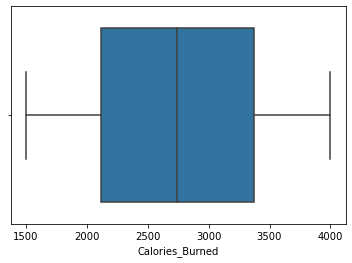

In [106]:
#import matplotlib.pyplot as plt
#import seaborn as sns

sns.boxplot(x=df_fit_final['Calories_Burned'])
plt.show()


In [107]:
Q1 = df_fit_final['Calories_Burned'].quantile(0.25)
Q3 = df_fit_final['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_fit_final[(df_fit_final['Calories_Burned'] < lower_bound) | 
                        (df_fit_final['Calories_Burned'] > upper_bound)]
print("Anzahl der Ausreißer:", len(outliers))


Anzahl der Ausreißer: 0


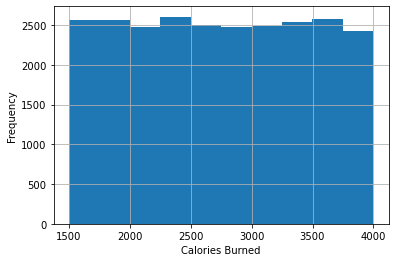

In [108]:
df_fit_final['Calories_Burned'].hist()
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.show()

In [109]:
#####################################  Applying ensemble methods  ##############################################################

In [115]:
################# BAGGING ############################################
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=40,
                               max_samples = 1000)

In [116]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=40)

In [117]:
pred = bagging_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MAE 636.7878866259315
RMSE 738.4247643585362
R2 score -0.028671941594804684


In [ ]:
######################### RANDOM FORREST ######################################

In [120]:
forest = RandomForestRegressor(n_estimators=50,  # trees 
                             max_depth=20) # depth of each tree

In [121]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50)

In [122]:
pred = forest.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_scaled, y_test))

MAE 632.8841061931912
RMSE 734.7191414432983
R2 score -0.018373517206860424


In [ ]:
######################### ADABOOST ######################################

In [124]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), # generally it would be shorter than an unique tree
                            n_estimators=100)

In [125]:
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=100)

In [126]:
pred = ada_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MAE 631.191440036272
RMSE 728.3132372122383
R2 score -0.0006928452191141687


In [ ]:
######################### GRADIENT BOOST ######################################

In [134]:
gb_reg = GradientBoostingRegressor(max_depth=5,
                                   n_estimators=100)

In [135]:
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5)

In [136]:
pred = gb_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MAE 633.9309071379294
RMSE 732.6832722378349
R2 score -0.012737614460870628
